In [2]:
# Filter Tropical Cyclones (TCs) that affect the site and parameterize

# inputs required: 
    # - Storm tracks records (ibtracks file)
    # - longitude and latitude of the site (location of the waves record)
    # - radius for TCs selection (º)

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import xarray as xr
import numpy as np

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.storms import Extract_Circle
from teslakit.plotting.storms import Plot_TCs_TracksParams, \
Plot_Historical_TCs_Tracks, Plot_Historical_TCs_Tracks_Category



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'
db = Database(p_data)

# set site
db.SetSite('GUAM')


In [3]:
# --------------------------------------
# load data and set parameters

xds_wmo = db.Load_TCs_noaa()  # noaa Allstorms.ibtracs_wmo

# wave point longitude and latitude
pnt_lon = 144.5
pnt_lat = 13.5

# radius for TCs selection (º)
r1 = 14
r2 = 4



## Historical TCs - extraction

In [4]:
# --------------------------------------
# Select Historical TCs inside circle

# dictionary with needed variable names 
d_vns = {
    'longitude': 'lon_wmo',
    'latitude': 'lat_wmo',
    'time': 'time_wmo',
    'pressure': 'pres_wmo',
}

# Select TCs that crosses a circular area R1
xds_TCs_r1_tracks, xds_TCs_r1_params = Extract_Circle(xds_wmo, pnt_lon, pnt_lat, r1, d_vns)

# Select TCs that crosses a circular area R2
xds_TCs_r2_tracks, xds_TCs_r2_params = Extract_Circle(xds_wmo, pnt_lon, pnt_lat, r2, d_vns)

# store data
db.Save_TCs_r1(xds_TCs_r1_tracks, xds_TCs_r1_params)
db.Save_TCs_r2(xds_TCs_r2_tracks, xds_TCs_r2_params)

print(xds_TCs_r1_tracks)
print()
print(xds_TCs_r2_tracks)


<xarray.Dataset>
Dimensions:          (center: 26, storm: 1197, time: 137)
Dimensions without coordinates: center, storm, time
Data variables:
    storm_sn         (storm) |S13 ...
    name             (storm) |S57 ...
    numObs           (storm) int16 ...
    season           (storm) int16 ...
    track_type       (storm) int8 ...
    genesis_basin    (storm) int8 ...
    num_basins       (storm) int8 ...
    basin            (storm, time) float32 ...
    wind_avg_period  (center) float32 ...
    source           (center) |S10 ...
    time_wmo         (storm, time) datetime64[ns] 1951-02-19T06:00:00.000043520 ... NaT
    lat_wmo          (storm, time) float32 20.0 20.0 23.0 25.0 ... nan nan nan
    lon_wmo          (storm, time) float32 138.5 138.5 142.09999 ... nan nan nan
    alt              (storm, time) float32 ...
    wind_wmo         (storm, time) float32 ...
    pres_wmo         (storm, time) float32 1010.0 1010.0 1000.0 ... nan nan nan
    sub_basin        (storm, time) floa

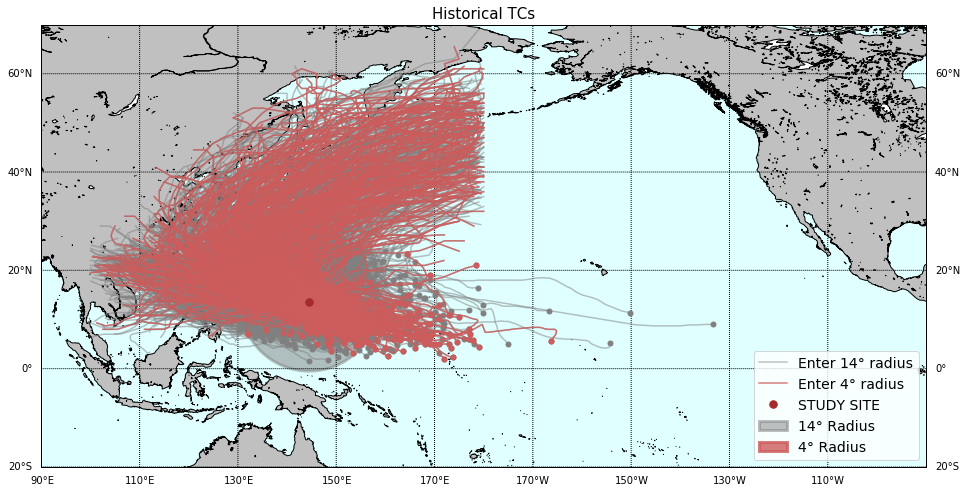

In [5]:
# Plot storm tracks world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -20, 70

Plot_Historical_TCs_Tracks(
    xds_TCs_r1_tracks, xds_TCs_r2_tracks,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1, r2,
)


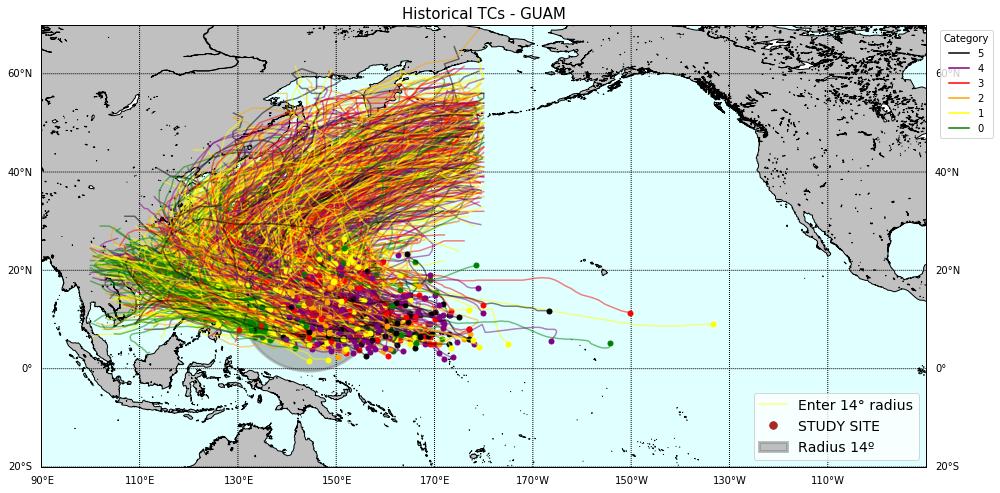

In [6]:
# Plot storm tracks category world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -20, 70
category = xds_TCs_r1_params.category

Plot_Historical_TCs_Tracks_Category(
    xds_TCs_r1_tracks, category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1,
)


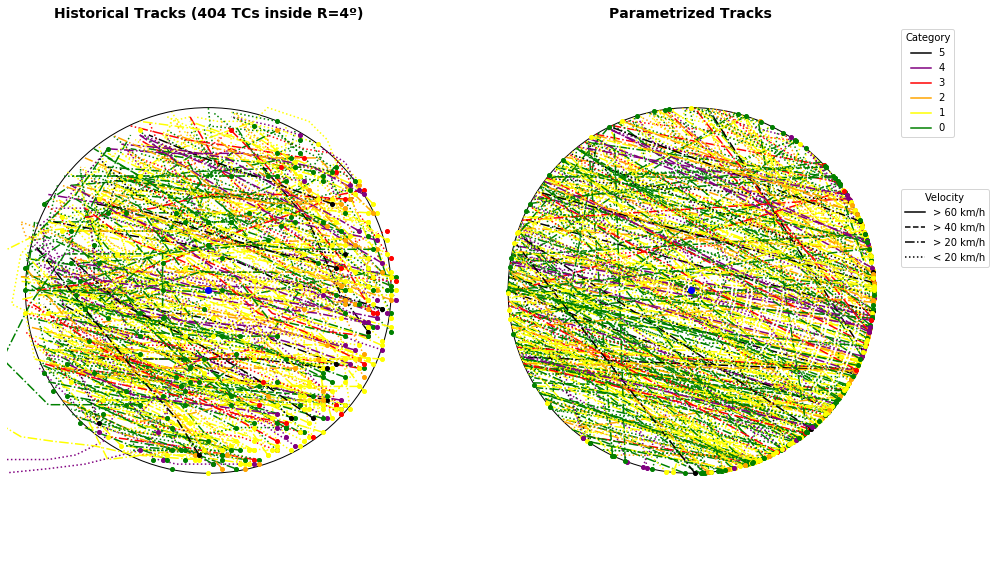

In [7]:
# Plot Historical TCs inside R2 (real tracks and parametrized tracks)

Plot_TCs_TracksParams(xds_TCs_r2_tracks, xds_TCs_r2_params)
